# Tutorial1: ray tracing using kgeo

---
This tutorial demonstrates generation of geodesics (photon trajectories) around a black hole using in the Kerr metric. \
The software used is kgeo by [Andrew Chael](https://achael.github.io/) which is documented at: https://github.com/achael/kgeo

In [1]:
import bhnerf
import numpy as np
from bhnerf import constants as consts

Welcome to eht-imaging! v 1.2.5 



In [2]:
"""
Generate rays across the equitorial plane of a non-spinning black hole
"""
npix = 64
inclination = 0.5
distance = 1000.0
spin = 0.0
image_coords = [np.linspace(-8.0,8.0,npix), np.zeros(npix)]
observer_coords=[0, distance, inclination, 0]

geodesics = bhnerf.kgeo.raytrace_ana(spin, observer_coords, image_coords, plotdata=False)

calculating preliminaries...
integrating in theta...0.05 s
integrating in r...0.05 s
done!   0.10334110260009766  seconds!


maxwraps  3


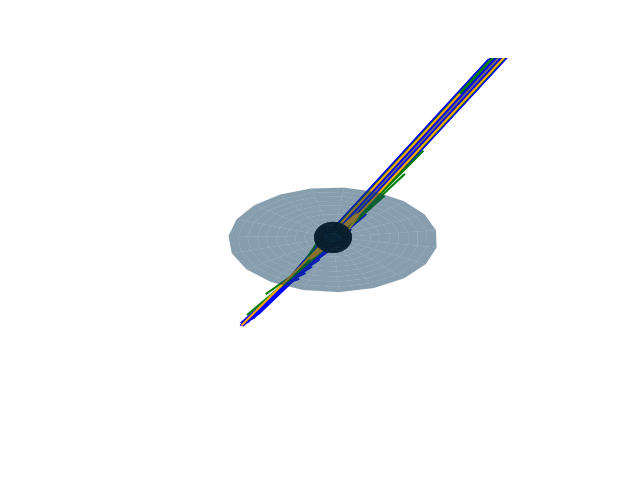

In [3]:
%matplotlib widget
geodesics.plotgeos(ngeoplot=-1)

In [4]:
"""
Use bhnerf wrapper to retrieve geodesics as an xarray dataset structure. 
A 64x64 image plane is computed for a given field of view
"""
spin = 0.3
inclination = np.deg2rad(60.0)

# Compute the fov (M) for the mass / distance of Sgr A*
fov_uas = 160.0
fov_rad = fov_uas * 4.85e-12
fov_M = (fov_rad *  consts.sgra_distance.to('m') / consts.GM_c2(consts.sgra_mass)).value

geos = bhnerf.kgeo.image_plane_geos(
    spin, inclination, 
    alpha_range=[-fov_M/2, fov_M/2],
    beta_range=[-fov_M/2, fov_M/2],
    num_alpha=64, num_beta=64, 
)

interactive(children=(IntSlider(value=31, description='ialpha', max=63), IntSlider(value=31, description='ibet…

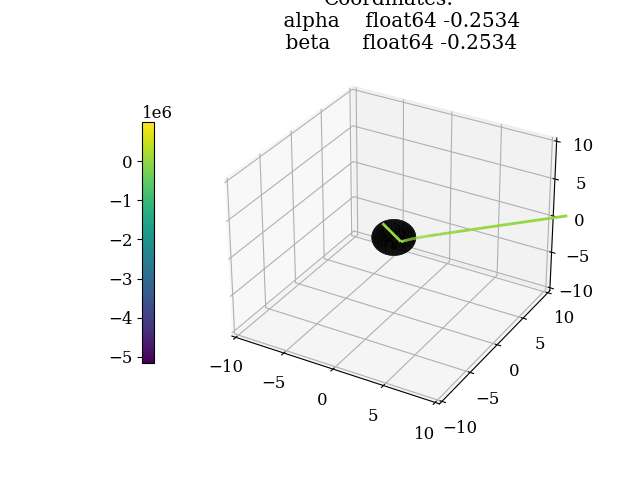

In [5]:
"""
Compute doppler boosting factor `g` for a Keplerian velocity field
Interactively visualize doppler boosting `g` along the geodesics
"""
Omega = np.sqrt(geos.M) / (geos.r**(3/2) + geos.spin * np.sqrt(geos.M))
g = bhnerf.kgeo.doppler_factor(geos, Omega, fillna=False)

%matplotlib widget
bhnerf.visualization.plot_geodesic_3D(g, geos);